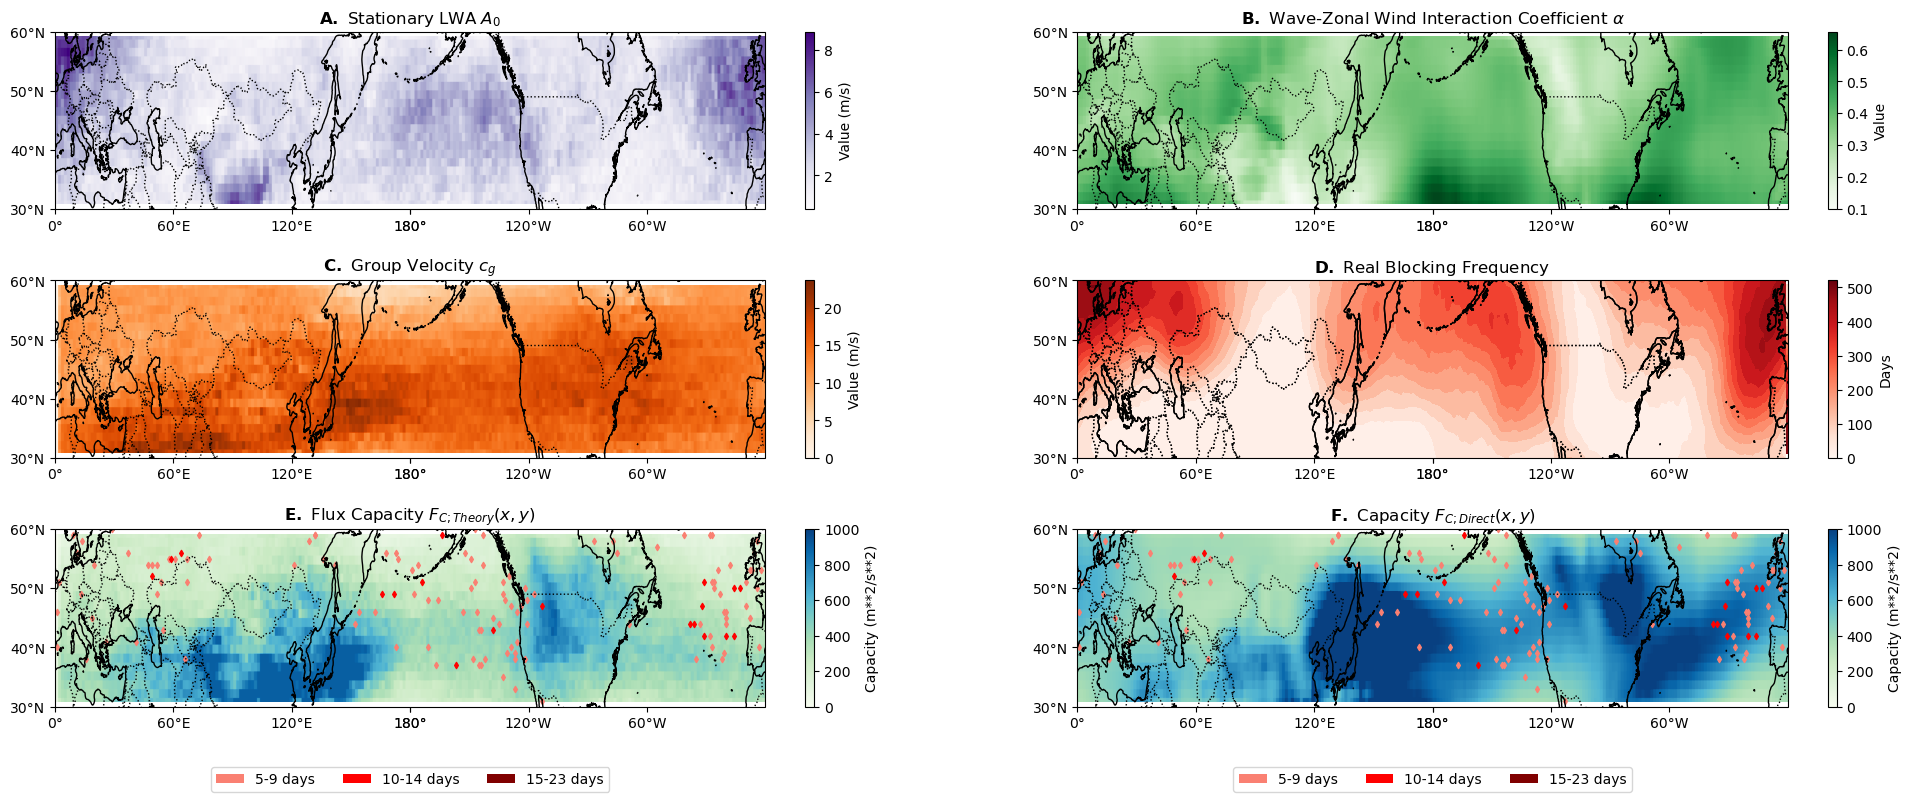

In [3]:
####### Fig 1
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import numpy as np
import os
from matplotlib.patches import Patch
import cartopy.feature as cfeature

import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import os
from matplotlib.patches import Patch
import cartopy.feature as cfeature

# Load data for all four plots 

output_directory = "/depot/wanglei/etc/KenYan_Traffic_Model/"
A0_winter_file = os.path.join(output_directory, "hn2016-falwa_calculation", "dist_of_A0_winter.npy")
slope_data_djf_file = os.path.join(output_directory, "alpha_regression_DJF", "slope_data_djf.npy")
reduced_Cg_file = os.path.join(output_directory, "hn2016-falwa_calculation", "reduced_Cg.npy")
capacity_file = os.path.join(output_directory, "hn2016-falwa_calculation", "NH18FluxCapacity.npy")
blocking_data_NH_file = os.path.join(output_directory, "Ka Ying Blocking Data", "BlockingEventDate4.0NH.npy")
blocking_data_SH_file = os.path.join(output_directory, "Ka Ying Blocking Data", "BlockingEventDate4.0SH.npy")

# Load the arrays
A0_winter = np.load(A0_winter_file)[80:101, :]
slope_data_djf = -np.load(slope_data_djf_file)[80:101, :]
reduced_Cg = np.load(reduced_Cg_file)[80:101, :]
capacity = np.load(capacity_file)
blocking_data_NH = np.load(blocking_data_NH_file, allow_pickle=True)
blocking_data_SH = np.load(blocking_data_SH_file, allow_pickle=True)



real_capacity = np.load('/depot/wanglei/etc/KenYan_Traffic_Model/Flux_Capacity_DJF.npy')
# Determine the min and max values for the capacity data
vmin_val = np.nanpercentile(real_capacity, 1)
vmax_val = np.nanpercentile(real_capacity, 99)
# print(vmin_val)
# print(vmax_val)
# Clip the capacity values to lie within the determined min and max
real_capacity = np.clip(real_capacity, vmin_val, vmax_val)


blocking_data_NH = np.load(blocking_data_NH_file, allow_pickle=True)
blocking_data_SH = np.load(blocking_data_SH_file, allow_pickle=True)


BlockingFreq = np.load("/depot/wanglei/etc/KenYan_Traffic_Model/Ka Ying Blocking Data/BlockingFrequency.npy")

# Latitude and Longitude data
Lat = np.load("/depot/wanglei/etc/KenYan_Traffic_Model/Ka Ying Blocking Data/ERA5_lat.npy")
Lon = np.load("/depot/wanglei/etc/KenYan_Traffic_Model/Ka Ying Blocking Data/ERA5_lon.npy")

# Filter out the latitudes that are outside of 30N to 60N
lat_indices = np.where((Lat >= 30) & (Lat <= 60))[0]
Lat = Lat[lat_indices]
BlockingFreq = BlockingFreq[lat_indices, :]

# Other required data and calculations for the fourth plot
blocking_data = np.vstack((blocking_data_NH, blocking_data_SH))
filtered_blocking_data = []
for event in blocking_data:
    event_date = event[0]
    if event_date.month in [1, 2, 12] and 1979 <= event_date.year <= 2016:
        filtered_blocking_data.append(event)
blocking_data = np.array(filtered_blocking_data)

longitudes = [int(row[2].split(":")[1].strip()) for row in blocking_data]
latitudes = [int(row[3].split(":")[1].strip()) for row in blocking_data]
durations = [int(row[1].split(":")[1].strip()) for row in blocking_data]

blocking_grid_5_9 = np.zeros((121, 240))
blocking_grid_10_14 = np.zeros((121, 240))
blocking_grid_15_23 = np.zeros((121, 240))

for lon, lat, duration in zip(longitudes, latitudes, durations):
    if 5 <= duration <= 9:
        blocking_grid_5_9[int((lat + 90) * 120 / 180), int(lon * 240 / 360)] = 1
    elif 10 <= duration <= 14:
        blocking_grid_10_14[int((lat + 90) * 120 / 180), int(lon * 240 / 360)] = 1
    elif 15 <= duration <= 23:
        blocking_grid_15_23[int((lat + 90) * 120 / 180), int(lon * 240 / 360)] = 1

vmin_val = np.nanpercentile(capacity, 1)
vmax_val = np.nanpercentile(capacity, 99)
capacity = np.clip(capacity, vmin_val, vmax_val)
lat_indices = np.arange(int((30 + 90) * 121 / 180), int((60 + 90) * 121 / 180))
capacity_subset = capacity[lat_indices, :]
real_capacity_subset = real_capacity[lat_indices, :]
blocking_grid_5_9_subset = blocking_grid_5_9[lat_indices, :]
blocking_grid_10_14_subset = blocking_grid_10_14[lat_indices, :]
blocking_grid_15_23_subset = blocking_grid_15_23[lat_indices, :]



fig, axs = plt.subplots(3, 2, figsize=(22.5, 7.5), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})




# Define a common colormap for all plots
common_cmap = 'GnBu'

# Define function to plot each map to avoid repetition
def plot_map(ax, data, title, transform=ccrs.PlateCarree(), cmap=common_cmap, vmin=None, vmax=None):
    ax.set_extent([0, 361, 30, 60], transform)
    heatmap = ax.imshow(data, extent=[0, 361, 30, 60], transform=transform, cmap=cmap, origin='lower', aspect=3, vmin=vmin, vmax=vmax)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    ax.set_yticks([30, 40, 50, 60], crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=False))
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.set_title(title)
    return heatmap

# Define individual colormaps for plots A, B, C, and D
cmap_A = 'Purples'
cmap_B = 'Greens'
cmap_C = 'Oranges'
cmap_D = 'Reds'

# Plot 1-4 with updated colormaps
heatmap1 = plot_map(axs[0, 0], A0_winter, r'$\mathbf{A. }$ Stationary LWA $A_0$', cmap=cmap_A)
heatmap2 = plot_map(axs[0, 1], slope_data_djf, r'$\mathbf{B. }$ Wave-Zonal Wind Interaction Coefficient $\alpha$', cmap=cmap_B)
heatmap3 = plot_map(axs[1, 0], reduced_Cg, r'$\mathbf{C. }$ Group Velocity $c_g$', cmap=cmap_C)
heatmap4 = plot_map(axs[1, 1], BlockingFreq, r'$\mathbf{D. }$ Real Blocking Frequency', cmap=cmap_D)


ax6 = axs[1, 1]
contour = ax6.contourf(Lon, Lat, BlockingFreq, 15, transform=ccrs.PlateCarree(), cmap=cmap_D)
ax6.add_feature(cfeature.COASTLINE)
ax6.add_feature(cfeature.BORDERS, linestyle=':')

# Plot 4: Capacity with Blocking Events
ax4 = axs[2, 0]
cs = plot_map(ax4, capacity_subset, r'$\mathbf{E. }$ Flux Capacity $F_{C; Theory}(x,y)$', vmin=0, vmax=1000)

lon_vals = np.linspace(0, 360, 240)
lat_vals = np.linspace(30, 60, len(lat_indices))
lon, lat = np.meshgrid(lon_vals, lat_vals)

# Plot 5: Capacity with Blocking Events

ax5 = axs[2, 1]
cs2 = plot_map(ax5, real_capacity_subset, r'$\mathbf{F. }$ Capacity $F_{C; Direct}(x,y)$', vmin=0, vmax=1000)

lon_vals = np.linspace(0, 360, 240)
lat_vals = np.linspace(30, 60, len(lat_indices))
lon, lat = np.meshgrid(lon_vals, lat_vals)

for lon, lat, duration in zip(longitudes, latitudes, durations):
    color = 'salmon' if 5 <= duration <= 9 else 'red' if 10 <= duration <= 14 else 'maroon'
    ax5.scatter(lon, lat, marker='d', color=color, s = 10, transform=ccrs.PlateCarree()) 


for lon, lat, duration in zip(longitudes, latitudes, durations):
    color = 'salmon' if 5 <= duration <= 9 else 'red' if 10 <= duration <= 14 else 'maroon'
    ax4.scatter(lon, lat, marker='d', color=color, s = 10, transform=ccrs.PlateCarree()) 


# Add colorbars for each plot
cbar_labels = ['Value (m/s)', 'Value', 'Value (m/s)', 'Days', 'Capacity (m**2/s**2)', 'Capacity (m**2/s**2)']
for i, heatmap in enumerate([heatmap1, heatmap2, heatmap3, heatmap4, cs, cs2]):
    row, col = divmod(i, 2)
    cbar = fig.colorbar(heatmap, ax=axs[row, col], orientation='vertical', fraction=0.03, pad=0.04)
    cbar.set_label(cbar_labels[i])


# Adjust legend for Plot 4 to spread horizontally and center below the plots
legend_elements = [
    Patch(facecolor='salmon', label='5-9 days'),
    Patch(facecolor='red', label='10-14 days'),
    Patch(facecolor='maroon', label='15-23 days')
]
# Place the legend at the center bottom of the figure
legend = axs[2, 0].legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3)
legend = axs[2, 1].legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3)



# Adjust layout to remove excessive margins
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.01, hspace=0.4)

# Show the plot
plt.show()

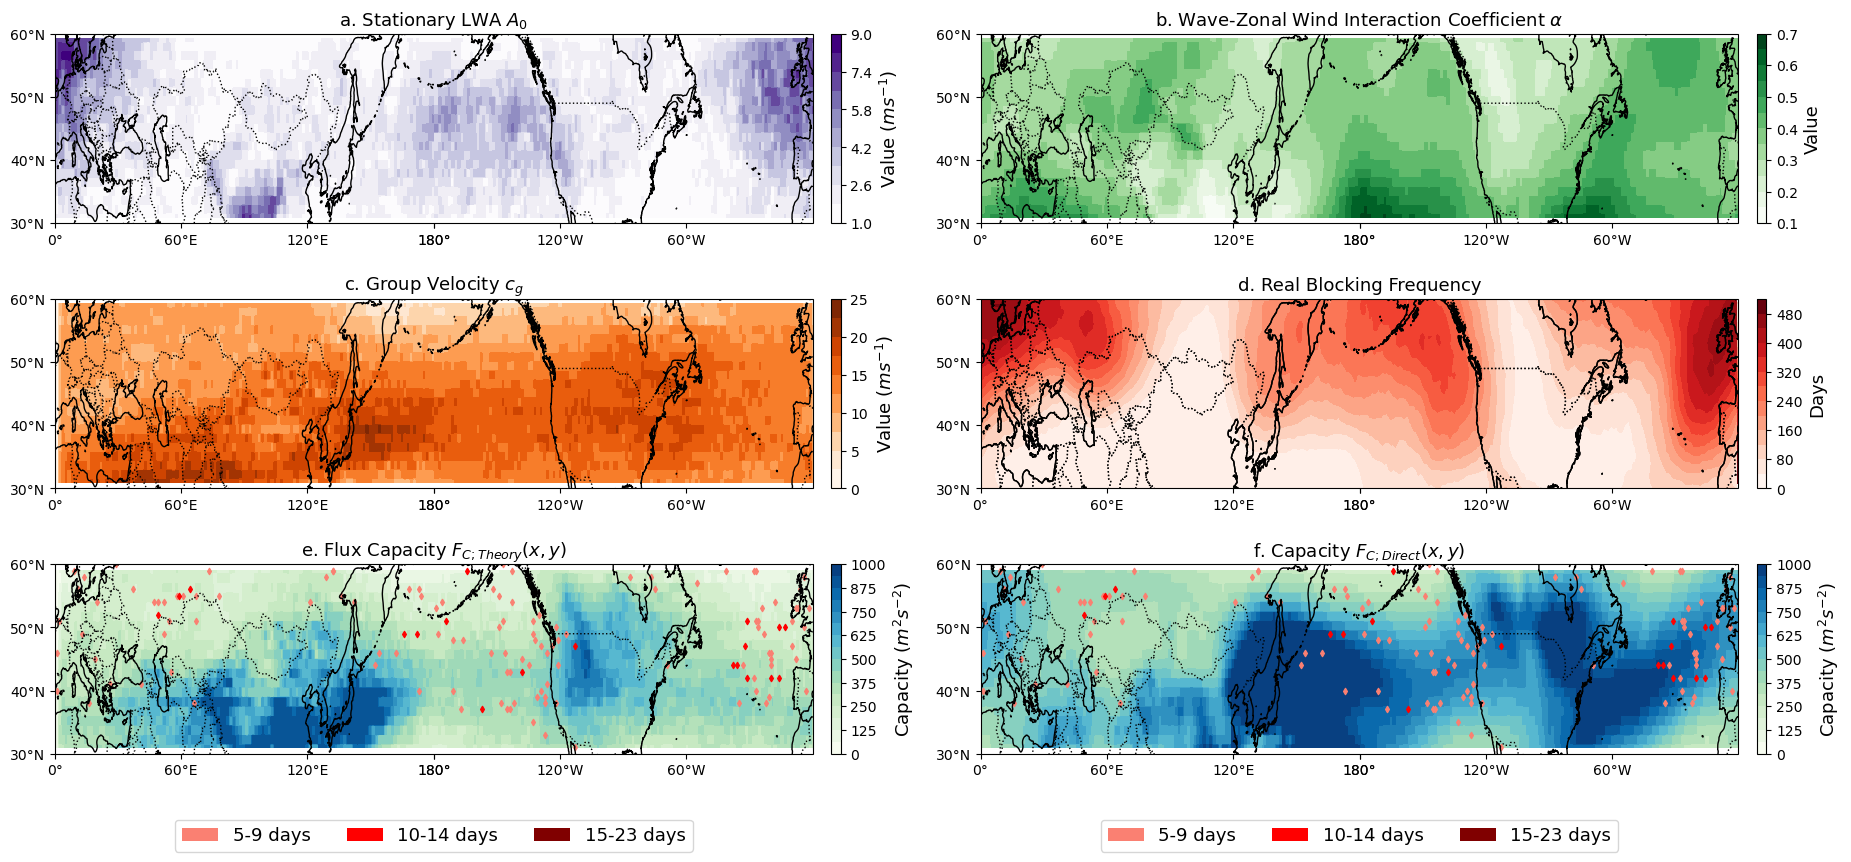

In [14]:
####### Fig 1 ver 0524
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import numpy as np
import os
from matplotlib.patches import Patch
import cartopy.feature as cfeature
from matplotlib.colors import BoundaryNorm

# Load data for all four plots 

output_directory = "/depot/wanglei/etc/KenYan_Traffic_Model/"
A0_winter_file = os.path.join(output_directory, "hn2016-falwa_calculation", "dist_of_A0_winter.npy")
slope_data_djf_file = os.path.join(output_directory, "alpha_regression_DJF", "slope_data_djf.npy")
reduced_Cg_file = os.path.join(output_directory, "hn2016-falwa_calculation", "reduced_Cg.npy")
capacity_file = os.path.join(output_directory, "hn2016-falwa_calculation", "NH18FluxCapacity.npy")
blocking_data_NH_file = os.path.join(output_directory, "Ka Ying Blocking Data", "BlockingEventDate4.0NH.npy")
blocking_data_SH_file = os.path.join(output_directory, "Ka Ying Blocking Data", "BlockingEventDate4.0SH.npy")

# Load the arrays
A0_winter = np.load(A0_winter_file)[80:101, :]
slope_data_djf = -np.load(slope_data_djf_file)[80:101, :]
reduced_Cg = np.load(reduced_Cg_file)[80:101, :]
capacity = np.load(capacity_file)
blocking_data_NH = np.load(blocking_data_NH_file, allow_pickle=True)
blocking_data_SH = np.load(blocking_data_SH_file, allow_pickle=True)



real_capacity = np.load('/depot/wanglei/etc/KenYan_Traffic_Model/Flux_Capacity_DJF.npy')
# Determine the min and max values for the capacity data
vmin_val = np.nanpercentile(real_capacity, 1)
vmax_val = np.nanpercentile(real_capacity, 99)
# print(vmin_val)
# print(vmax_val)
# Clip the capacity values to lie within the determined min and max
real_capacity = np.clip(real_capacity, vmin_val, vmax_val)


blocking_data_NH = np.load(blocking_data_NH_file, allow_pickle=True)
blocking_data_SH = np.load(blocking_data_SH_file, allow_pickle=True)


BlockingFreq = np.load("/depot/wanglei/etc/KenYan_Traffic_Model/Ka Ying Blocking Data/BlockingFrequency.npy")

# Latitude and Longitude data
Lat = np.load("/depot/wanglei/etc/KenYan_Traffic_Model/Ka Ying Blocking Data/ERA5_lat.npy")
Lon = np.load("/depot/wanglei/etc/KenYan_Traffic_Model/Ka Ying Blocking Data/ERA5_lon.npy")

# Filter out the latitudes that are outside of 30N to 60N
lat_indices = np.where((Lat >= 30) & (Lat <= 60))[0]
Lat = Lat[lat_indices]
BlockingFreq = BlockingFreq[lat_indices, :]

# Other required data and calculations for the fourth plot
blocking_data = np.vstack((blocking_data_NH, blocking_data_SH))
filtered_blocking_data = []
for event in blocking_data:
    event_date = event[0]
    if event_date.month in [1, 2, 12] and 1979 <= event_date.year <= 2016:
        filtered_blocking_data.append(event)
blocking_data = np.array(filtered_blocking_data)

longitudes = [int(row[2].split(":")[1].strip()) for row in blocking_data]
latitudes = [int(row[3].split(":")[1].strip()) for row in blocking_data]
durations = [int(row[1].split(":")[1].strip()) for row in blocking_data]

blocking_grid_5_9 = np.zeros((121, 240))
blocking_grid_10_14 = np.zeros((121, 240))
blocking_grid_15_23 = np.zeros((121, 240))

for lon, lat, duration in zip(longitudes, latitudes, durations):
    if 5 <= duration <= 9:
        blocking_grid_5_9[int((lat + 90) * 120 / 180), int(lon * 240 / 360)] = 1
    elif 10 <= duration <= 14:
        blocking_grid_10_14[int((lat + 90) * 120 / 180), int(lon * 240 / 360)] = 1
    elif 15 <= duration <= 23:
        blocking_grid_15_23[int((lat + 90) * 120 / 180), int(lon * 240 / 360)] = 1

vmin_val = np.nanpercentile(capacity, 1)
vmax_val = np.nanpercentile(capacity, 99)
capacity = np.clip(capacity, vmin_val, vmax_val)
lat_indices = np.arange(int((30 + 90) * 121 / 180), int((60 + 90) * 121 / 180))
capacity_subset = capacity[lat_indices, :]
real_capacity_subset = real_capacity[lat_indices, :]
blocking_grid_5_9_subset = blocking_grid_5_9[lat_indices, :]
blocking_grid_10_14_subset = blocking_grid_10_14[lat_indices, :]
blocking_grid_15_23_subset = blocking_grid_15_23[lat_indices, :]

levs1 = np.linspace(1, 9, 11)
norm1 = BoundaryNorm(levs1, ncolors = 256, clip = True)

levs2 = np.linspace(0.1, 0.7, 13)
norm2 = BoundaryNorm(levs2, ncolors = 256, clip = True)

levs3 = np.linspace(0, 25, 11)
norm3 = BoundaryNorm(levs3, ncolors = 256, clip = True)

levs4 = np.linspace(0, 520, 14)
norm4 = BoundaryNorm(levs4, ncolors = 256, clip = True)

levs5 = np.linspace(0, 1000, 17)
norm5 = BoundaryNorm(levs5, ncolors = 256, clip = True)

fig, axs = plt.subplots(3, 2, figsize=(22.5, 7.5), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})




# Define a common colormap for all plots
common_cmap = 'GnBu'

# Define function to plot each map with font adjustments
def plot_map(ax, data, title, transform=ccrs.PlateCarree(), cmap='GnBu', vmin=None, vmax=None, norm=None):
    ax.set_extent([0, 361, 30, 60], transform)
    heatmap = ax.imshow(data, extent=[0, 361, 30, 60], transform=transform, cmap=cmap, origin='lower', aspect=3, vmin=vmin, vmax=vmax, norm=norm)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    ax.set_yticks([30, 40, 50, 60], crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=False))
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.set_title(title, fontsize=13)  # Set font size for titles
    return heatmap

# Define individual colormaps for plots A, B, C, and D
cmap_A = 'Purples'
cmap_B = 'Greens'
cmap_C = 'Oranges'
cmap_D = 'Reds'

# Plot 1-4 with updated colormaps
heatmap1 = plot_map(axs[0, 0], A0_winter, r'a. Stationary LWA $A_0$', cmap=cmap_A, norm = norm1)
heatmap2 = plot_map(axs[0, 1], slope_data_djf, r'b. Wave-Zonal Wind Interaction Coefficient $\alpha$', cmap=cmap_B, norm = norm2)
heatmap3 = plot_map(axs[1, 0], reduced_Cg, r'c. Group Velocity $c_g$', cmap=cmap_C, norm = norm3)
heatmap4 = plot_map(axs[1, 1], BlockingFreq, r'd. Real Blocking Frequency', cmap=cmap_D, norm = norm4)


ax6 = axs[1, 1]
contour = ax6.contourf(Lon, Lat, BlockingFreq, 15, transform=ccrs.PlateCarree(), cmap=cmap_D)
ax6.add_feature(cfeature.COASTLINE)
ax6.add_feature(cfeature.BORDERS, linestyle=':')

# Plot 4: Capacity with Blocking Events
ax4 = axs[2, 0]
cs = plot_map(ax4, capacity_subset, r'e. Flux Capacity $F_{C; Theory}(x,y)$', norm = norm5)

lon_vals = np.linspace(0, 360, 240)
lat_vals = np.linspace(30, 60, len(lat_indices))
lon, lat = np.meshgrid(lon_vals, lat_vals)

# Plot 5: Capacity with Blocking Events

ax5 = axs[2, 1]
cs2 = plot_map(ax5, real_capacity_subset, r'f. Capacity $F_{C; Direct}(x,y)$', norm = norm5)

lon_vals = np.linspace(0, 360, 240)
lat_vals = np.linspace(30, 60, len(lat_indices))
lon, lat = np.meshgrid(lon_vals, lat_vals)

for lon, lat, duration in zip(longitudes, latitudes, durations):
    color = 'salmon' if 5 <= duration <= 9 else 'red' if 10 <= duration <= 14 else 'maroon'
    ax5.scatter(lon, lat, marker='d', color=color, s = 10, transform=ccrs.PlateCarree()) 


for lon, lat, duration in zip(longitudes, latitudes, durations):
    color = 'salmon' if 5 <= duration <= 9 else 'red' if 10 <= duration <= 14 else 'maroon'
    ax4.scatter(lon, lat, marker='d', color=color, s = 10, transform=ccrs.PlateCarree()) 


# Add colorbars for each plot
cbar_labels = [r'Value ($ms^{-1}$)', 'Value', r'Value ($ms^{-1}$)', 'Days', r'Capacity ($m^2s^{-2}$)', r'Capacity ($m^2s^{-2}$)']
for i, heatmap in enumerate([heatmap1, heatmap2, heatmap3, heatmap4, cs, cs2]):
    row, col = divmod(i, 2)
    cbar = fig.colorbar(heatmap, ax=axs[row, col], orientation='vertical', fraction=0.03, pad=0.015)
    cbar.set_label(cbar_labels[i], fontsize=13)


# Adjust legend for Plot 4 to spread horizontally and center below the plots
legend_elements = [
    Patch(facecolor='salmon', label='5-9 days'),
    Patch(facecolor='red', label='10-14 days'),
    Patch(facecolor='maroon', label='15-23 days')
]
# Place the legend at the center bottom of the figure
legend = axs[2, 0].legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3, fontsize=13)  # Set font size for legend
legend = axs[2, 1].legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3, fontsize=13)  # Set font size for legend



# Adjust layout to remove excessive margins
plt.subplots_adjust(left=0.02, right=0.98, top=0.98, bottom=0.02, wspace=-0.25, hspace=0.4)

# Show the plot
plt.show()